In [64]:
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.linear_model import LinearRegression


import os # Good for navigating your computer's files 
import sys
pd.options.mode.chained_assignment = None #suppress warnings

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [66]:
airq = pd.read_csv("air_quality_no2.csv")

del airq["Unnamed: 4"]
del airq["Unnamed: 5"]

In [67]:
airq.head()

datetime  station_antwerp  station_paris  station_london
0  5/7/19 2:00              NaN            NaN            23.0
1  5/7/19 3:00             50.5           25.0            19.0
2  5/7/19 4:00             45.0           27.7            19.0
3  5/7/19 5:00              NaN           50.4            16.0
4  5/7/19 6:00              NaN           61.9             NaN

In [68]:
airq = airq.dropna()

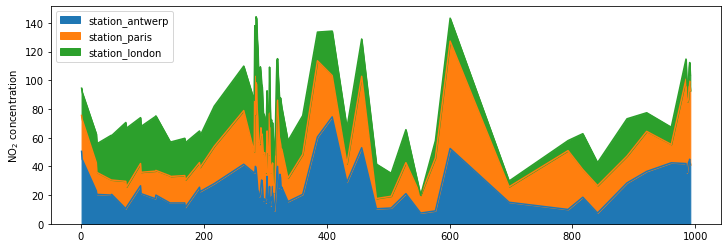

In [69]:
fig, axs = plt.subplots(figsize=(12, 4))

airq.plot.area(ax=axs)

axs.set_ylabel("NO$_2$ concentration")

fig.savefig("no2_concentrations.png")

In [70]:
X = airq.iloc[0:1036, 1:4]
X

station_antwerp  station_paris  station_london
1               50.5           25.0            19.0
2               45.0           27.7            19.0
25              23.0           19.6            20.0
26              20.5           15.3            20.0
49              20.0           10.6            31.0
..               ...            ...             ...
988             39.5           45.7            11.0
989             42.5           44.8            12.0
990             43.5           52.3            13.0
991             45.0           54.4            13.0
992             41.0           51.6            11.0

[93 rows x 3 columns]

In [71]:
def is_london(temp):
    if temp <= 70:
        return True
    else:
        return False
    
airq["is_in_london"] = airq["station_london"].apply(is_london)

In [72]:
y = airq["is_in_london"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [74]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))

In [77]:
from math import sqrt
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  0.0  & mae =  0.0  & rmse =  0.0
